# MultiPolygon `has_interior`
Function looks for all (Multi)Polygon features that has interiors and mark them using boolean predicate.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

os.getcwd()

'/home/lukasz/Projects/geonurse/notebooks'

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint

from geonurse.tools.polygon import has_interior, has_interior_duplicates, _duplicated_interior_coordinates_list

## Load data

In [4]:
DATA_PATH = '../tests/tools/polygon/data/interior'

### Test layer 1

#### Read data

In [5]:
polygons = gpd.read_file(os.path.join(DATA_PATH, 'test_data_multipolygon_interior_duplicates.geojson'))

In [6]:
polygons.head()

,id,geometry
0,1,"POLYGON ((151 -285, 352 -279, 352 -279, 364 -3..."
1,10,(POLYGON ((-43.99851510731804 50.9361132418613...
2,11,(POLYGON ((614.4012341319128 -407.188693482606...
3,12,(POLYGON ((201.3135438049186 -609.113347220721...
4,13,POLYGON ((681.7094520446183 -601.1947333486387...


#### Plot data

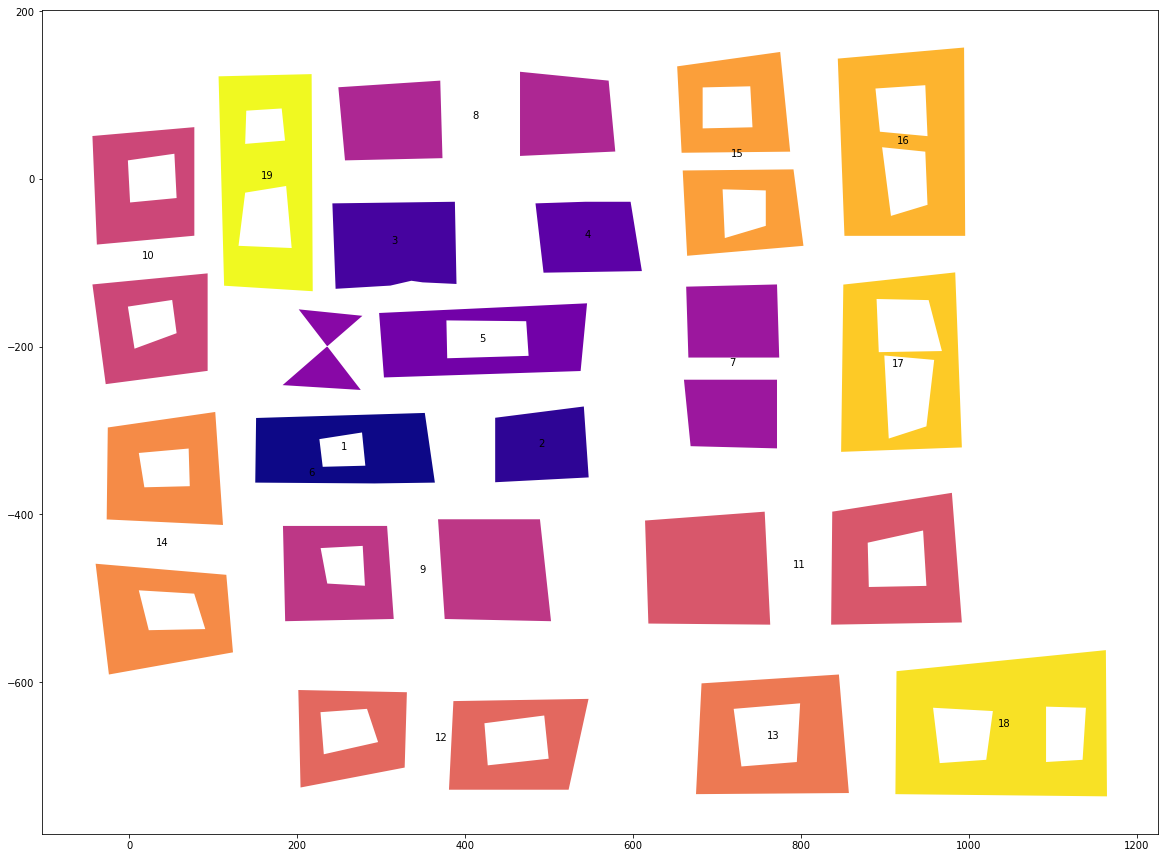

In [7]:
ax = polygons.plot(figsize=(20,20), column='id', cmap='plasma')

polygons.apply(lambda x: ax.annotate(s=x.id, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
print()

#### Find geometries with interiors

In [8]:
has_interior = polygons.geometry.apply(has_interior)

assert len(polygons) == len(has_interior)

polygons_with_interiors = polygons[has_interior]  # select data that have interiors

In [9]:
polygons_with_interiors.head()

,id,geometry
0,1,"POLYGON ((151 -285, 352 -279, 352 -279, 364 -3..."
1,10,(POLYGON ((-43.99851510731804 50.9361132418613...
2,11,(POLYGON ((614.4012341319128 -407.188693482606...
3,12,(POLYGON ((201.3135438049186 -609.113347220721...
4,13,POLYGON ((681.7094520446183 -601.1947333486387...


#### Plot filtered geometries

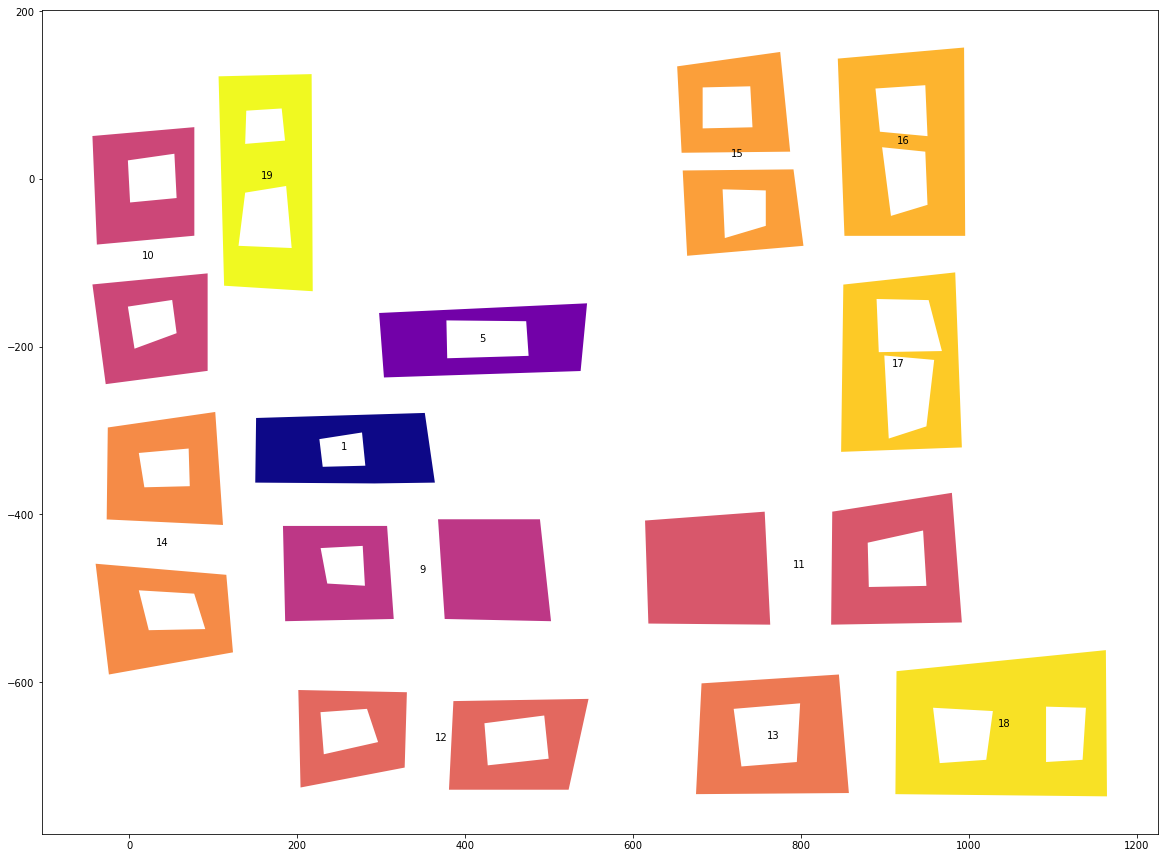

In [10]:
ax = polygons_with_interiors.plot(figsize=(20,20), column='id', cmap='plasma')

polygons_with_interiors.apply(lambda x: ax.annotate(s=x.id, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
print()

#### Save filtered geometries

polygons_with_interiors.to_file(
    os.path.join(DATA_PATH, 'expected_multipolygon_with_interior.geojson'),
    driver='GeoJSON'
)